In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/share-of-adults-who-are-overweight.csv')
df.head(5)

,Entity,Code,Year,"Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years of age"
0,Afghanistan,AFG,1990,10.13355
1,Afghanistan,AFG,1991,10.73641
2,Afghanistan,AFG,1992,11.37092
3,Afghanistan,AFG,1993,12.03992
4,Afghanistan,AFG,1994,12.74325


In [3]:
df.tail(5)

,Entity,Code,Year,"Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years of age"
6793,Zimbabwe,ZWE,2018,32.25148
6794,Zimbabwe,ZWE,2019,32.78359
6795,Zimbabwe,ZWE,2020,33.32772
6796,Zimbabwe,ZWE,2021,33.89057
6797,Zimbabwe,ZWE,2022,34.46230


**Data Cleaning**

- Handle missing values

- Standardize country names

- Ensure numeric columns are in proper format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 4 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Entity                                                                                                                             6798 non-null   object 
 1   Code                                                                                                                               6600 non-null   object 
 2   Year                                                                                                                               6798 non-null   int64  
 3   Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: b

In [5]:
df.isna().sum()

,0
Entity,0
Code,198
Year,0
"Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years of age",0


In [6]:
df.drop(columns=['Code'],inplace= True)

In [7]:
df.rename(columns={'Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+  years of age': 'Overweight_Prevalence'}, inplace=True)
df.head()

,Entity,Year,Overweight_Prevalence
0,Afghanistan,1990,10.13355
1,Afghanistan,1991,10.73641
2,Afghanistan,1992,11.37092
3,Afghanistan,1993,12.03992
4,Afghanistan,1994,12.74325


In [8]:
df.rename(columns={'Entity': 'Country'}, inplace=True)
df.head()

,Country,Year,Overweight_Prevalence
0,Afghanistan,1990,10.13355
1,Afghanistan,1991,10.73641
2,Afghanistan,1992,11.37092
3,Afghanistan,1993,12.03992
4,Afghanistan,1994,12.74325


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Country'].unique(),df['Country'].nunique()

(array(['Afghanistan', 'Africa (WHO)', 'Albania', 'Algeria',
        'American Samoa', 'Americas (WHO)', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
        'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
        'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
        'Croatia', 'Cuba', 'Cyprus', 'Czechia',
        'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Eastern Mediterranean (WHO)',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Europe (W

In [11]:
df['Country'] = df['Country'].replace('Africa (WHO)', 'Africa')
df['Country'] = df['Country'].replace('American Samoa', 'American')
df['Country'] = df['Country'].replace('Americas (WHO)', 'Americas')
df['Country'] = df['Country'].replace('World', 'Africa')
df['Country'] = df['Country'].replace('Western Pacific (WHO)', 'Western Pacific')
df['Country'] = df['Country'].replace('South-East Asia (WHO)', 'South-East Asia')
df['Country'] = df['Country'].replace('Niger', 'Nigeria')
df['Country'] = df['Country'].replace('Micronesia (country)', 'Micronesia')
df['Country'] = df['Country'].replace('Europe (WHO)', 'Europe')
df['Country'] = df['Country'].replace('Eastern Mediterranean (WHO)', 'Eastern Mediterranean')
df['Country'] = df['Country'].replace('Caribbean (WHO)', 'Caribbean')
df['Country'] = df['Country'].replace('Central Europe (WHO)', 'Central Europe')
df['Country'] = df['Country'].replace('Central Asia (WHO)', 'Central Asia')
df['Country'] = df['Country'].replace('Central Africa (WHO)', 'Central Africa')
df['Country'] = df['Country'].replace('Central America (WHO)', 'Central America')
df['Country'].nunique()

204

In [12]:
region_map = {
    "Africa": "Africa",
    "Europe": "Europe",
    "Eastern Mediterranean": "Middle East",
    "Americas": "North/South America",
    "South-East Asia": "Asia",
    "Western Pacific": "Pacific Asia",
    "World": "Global"
}

df["Region"] = df["Country"].map(region_map).fillna(df["Country"])


In [13]:
df.head(5)

,Country,Year,Overweight_Prevalence,Region
0,Afghanistan,1990,10.13355,Afghanistan
1,Afghanistan,1991,10.73641,Afghanistan
2,Afghanistan,1992,11.37092,Afghanistan
3,Afghanistan,1993,12.03992,Afghanistan
4,Afghanistan,1994,12.74325,Afghanistan


In [14]:
df.tail(10)

,Country,Year,Overweight_Prevalence,Region
6788,Zimbabwe,2013,29.76759,Zimbabwe
6789,Zimbabwe,2014,30.23861,Zimbabwe
6790,Zimbabwe,2015,30.72174,Zimbabwe
6791,Zimbabwe,2016,31.21832,Zimbabwe
6792,Zimbabwe,2017,31.72858,Zimbabwe
6793,Zimbabwe,2018,32.25148,Zimbabwe
6794,Zimbabwe,2019,32.78359,Zimbabwe
6795,Zimbabwe,2020,33.32772,Zimbabwe
6796,Zimbabwe,2021,33.89057,Zimbabwe
6797,Zimbabwe,2022,34.46230,Zimbabwe


In [15]:
df.isna().sum()

,0
Country,0
Year,0
Overweight_Prevalence,0
Region,0


**Exploratory Data Analysis (EDA)**

- Global average overweight prevalence per year
- Top 10 countries with the largest increase/decrease

In [16]:
df.describe()

,Year,Overweight_Prevalence
count,6798.000000,6798.000000
mean,2006.000000,43.669349
std,9.522605,19.710129
min,1990.000000,2.817660
25%,1998.000000,27.466555
50%,2006.000000,47.153180
75%,2014.000000,56.469220
max,2022.000000,91.408620


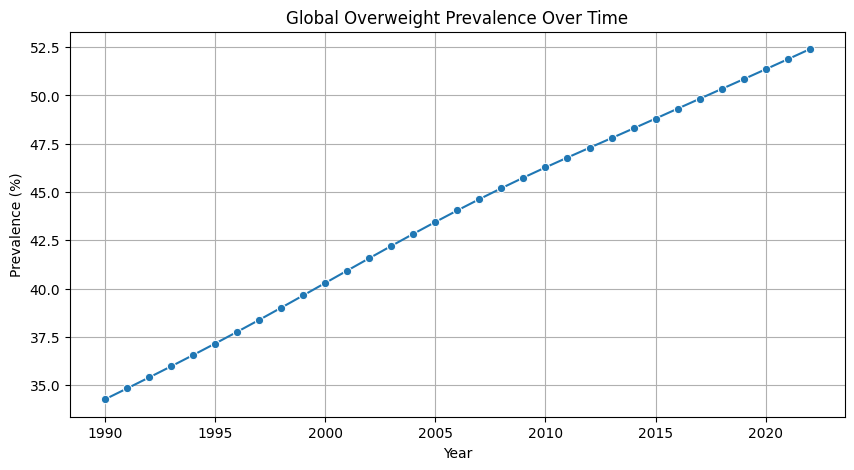

In [17]:
import plotly.express as px

global_trend = df.groupby("Year")["Overweight_Prevalence"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=global_trend, x="Year", y="Overweight_Prevalence", marker="o")
plt.title("Global Overweight Prevalence Over Time")
plt.ylabel("Prevalence (%)")
plt.grid(True)
plt.show()

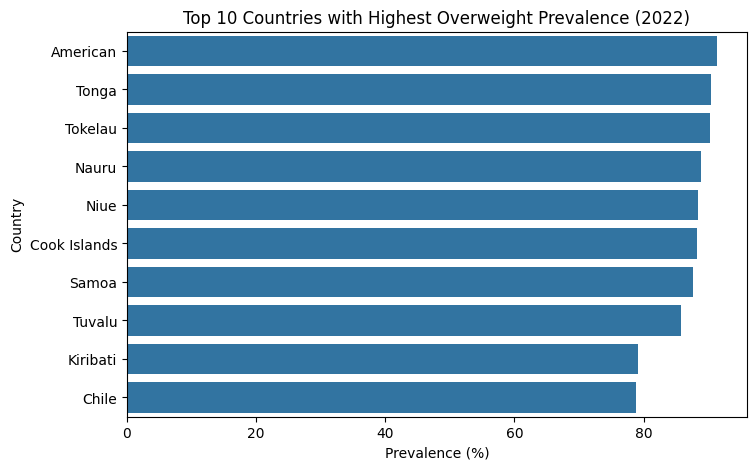

In [18]:
latest_year = df["Year"].max()
top10 = df[df["Year"] == latest_year].nlargest(10, "Overweight_Prevalence")

plt.figure(figsize=(8,5))
sns.barplot(data=top10, x="Overweight_Prevalence", y="Country")
plt.title(f"Top 10 Countries with Highest Overweight Prevalence ({latest_year})")
plt.xlabel("Prevalence (%)")
plt.show()

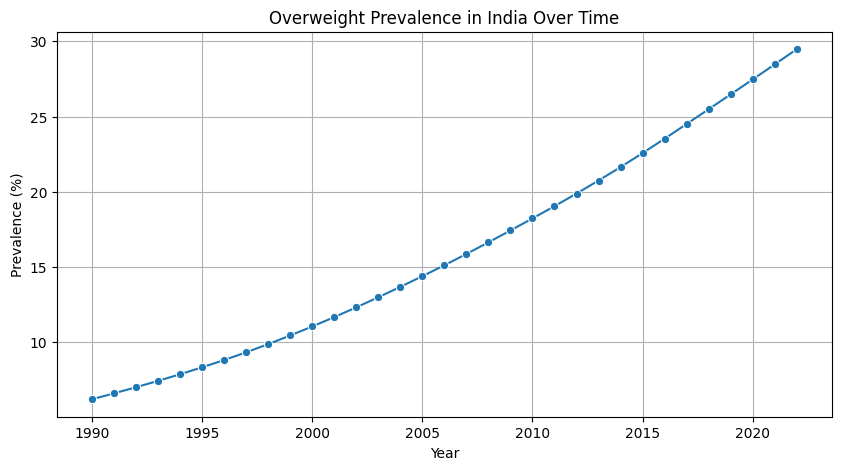

In [19]:
# Trend for a specific country
country_name = "India"  # Change to any country in your dataset
country_data = df[df["Country"] == country_name]

plt.figure(figsize=(10,5))
sns.lineplot(data=country_data, x="Year", y="Overweight_Prevalence", marker="o")
plt.title(f"Overweight Prevalence in {country_name} Over Time")
plt.ylabel("Prevalence (%)")
plt.grid(True)
plt.show()


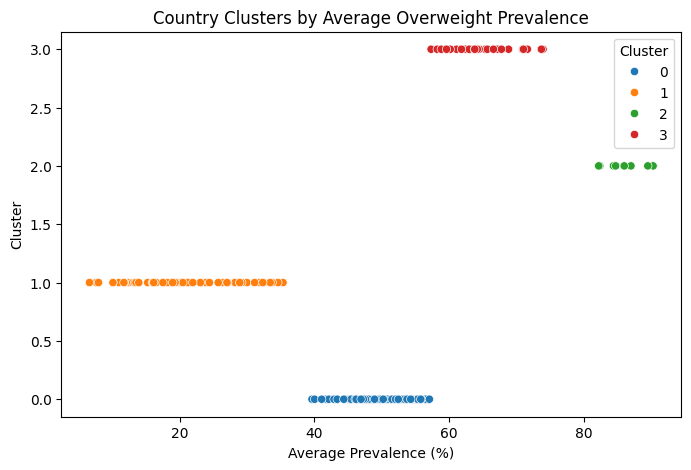

Cluster 1:
['Afghanistan', 'Africa', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Djibouti', 'East Timor', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Japan', 'Kenya', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nigeria', 'North Korea', 'Pakistan', 'Philippines', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Singapore', 'Somalia', 'South Korea', 'South Sudan', 'South-East Asia', 'Sri Lanka', 'Sudan', 'Tanzania', 'Thailand', 'Togo', 'Uganda', 'Vietnam', 'Western Pacific', 'Yemen', 'Zambia', 'Zimbabwe']

Cluster 0:
['Albania', 'Algeria', 'Americas', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aus

In [20]:
from sklearn.cluster import KMeans

# Prepare data for clustering (average prevalence per country)
cluster_df = df.groupby("Country")["Overweight_Prevalence"].mean().reset_index()

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df["Cluster"] = kmeans.fit_predict(cluster_df[["Overweight_Prevalence"]])

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=cluster_df, x="Overweight_Prevalence", y="Cluster", hue="Cluster", palette="tab10")
plt.title("Country Clusters by Average Overweight Prevalence")
plt.xlabel("Average Prevalence (%)")
plt.show()

# Show sample countries in each cluster
for c in cluster_df["Cluster"].unique():
    print(f"Cluster {c}:")
    print(cluster_df[cluster_df["Cluster"] == c]["Country"].tolist())
    print()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp719dzp9d/518nxvyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp719dzp9d/f2fqnkuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95520', 'data', 'file=/tmp/tmp719dzp9d/518nxvyf.json', 'init=/tmp/tmp719dzp9d/f2fqnkuc.json', 'output', 'file=/tmp/tmp719dzp9d/prophet_modelahc321h4/prophet_model-20250813042650.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


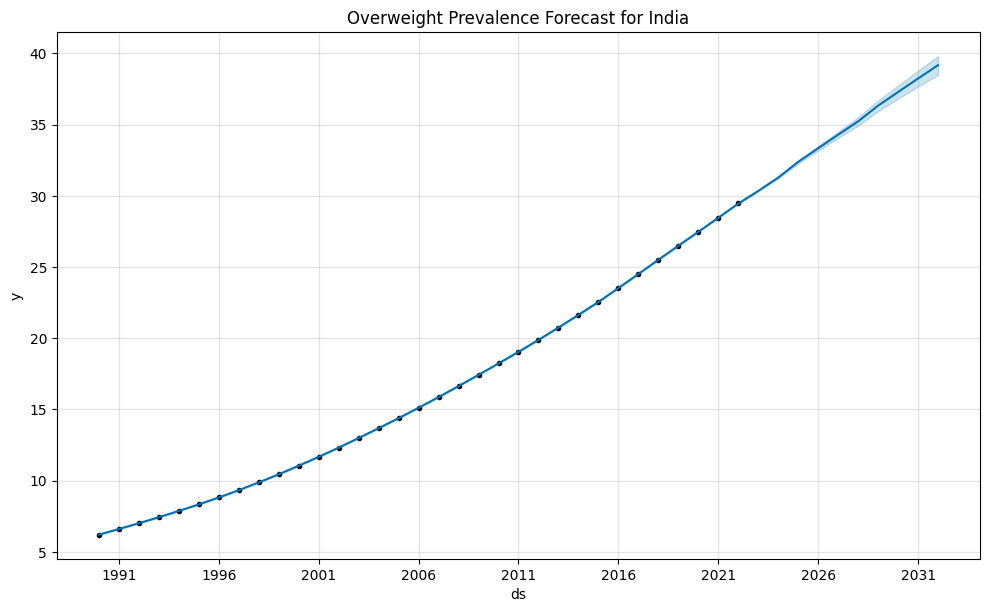

In [21]:
from prophet import Prophet

# Prepare data for Prophet (specific country)
forecast_country = "India"
forecast_df = df[df["Country"] == forecast_country][["Year", "Overweight_Prevalence"]].copy()
forecast_df.rename(columns={"Year": "ds", "Overweight_Prevalence": "y"}, inplace=True)
forecast_df["ds"] = pd.to_datetime(forecast_df["ds"], format="%Y")

# Fit model
model = Prophet()
model.fit(forecast_df)

# Predict next 10 years
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"Overweight Prevalence Forecast for {forecast_country}")
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp719dzp9d/dk642qer.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp719dzp9d/rziyd04r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32524', 'data', 'file=/tmp/tmp719dzp9d/dk642qer.json', 'init=/tmp/tmp719dzp9d/rziyd04r.json', 'output', 'file=/tmp/tmp719dzp9d/prophet_modelrtsdzs5o/prophet_model-20250813042651.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:26:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


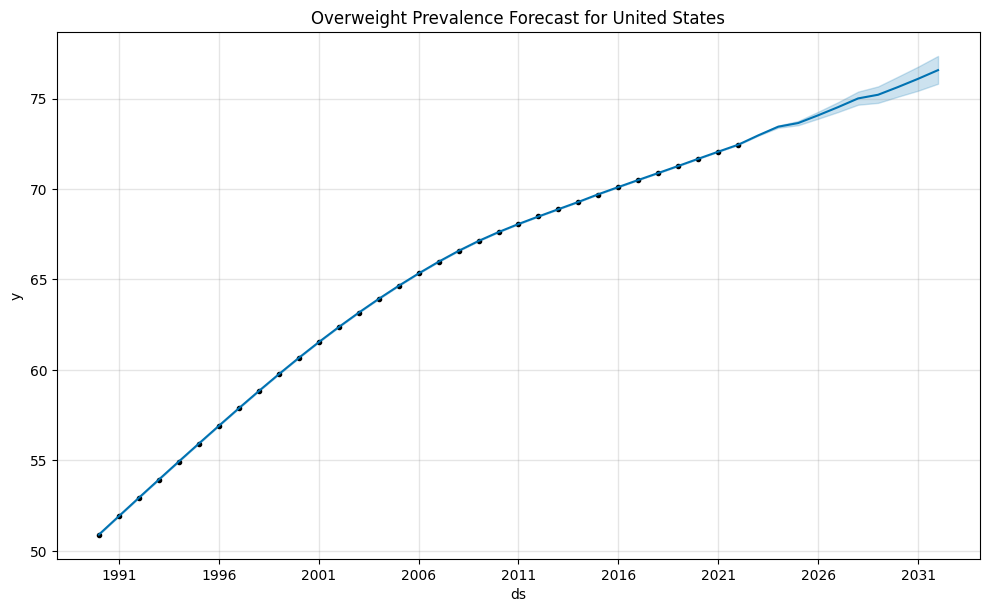

In [22]:
from prophet import Prophet

# Prepare data for Prophet (specific country)
forecast_country = "United States"
forecast_df = df[df["Country"] == forecast_country][["Year", "Overweight_Prevalence"]].copy()
forecast_df.rename(columns={"Year": "ds", "Overweight_Prevalence": "y"}, inplace=True)
forecast_df["ds"] = pd.to_datetime(forecast_df["ds"], format="%Y")

# Fit model
model = Prophet()
model.fit(forecast_df)

# Predict next 10 years
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"Overweight Prevalence Forecast for {forecast_country}")
plt.show()


In [23]:
df.to_csv('overweight_prevalence.csv', index=False)